# Load your data

In scikit-network, a graph is represented by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) (or biadjacency matrix for a bipartite graph) in the [Compressed Sparse Row](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) format of SciPy.

In this tutorial, we present a few methods to instantiate a graph in this format.

In [1]:
from IPython.display import SVG

import numpy as np
from scipy import sparse
import pandas as pd

from sknetwork.data import from_edge_list, from_adjacency_list, from_graphml, from_csv
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## From a NumPy array
For small graphs, you can instantiate the adjacency matrix as a dense NumPy array and convert it into a sparse matrix in CSR format.

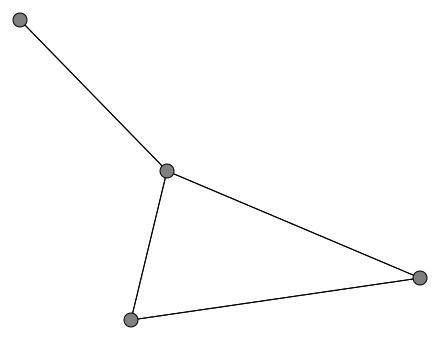

In [2]:
adjacency = np.array([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]])
adjacency = sparse.csr_matrix(adjacency)

image = svg_graph(adjacency)
SVG(image)

## From an edge list
Another natural way to build a graph is from a list of edges.

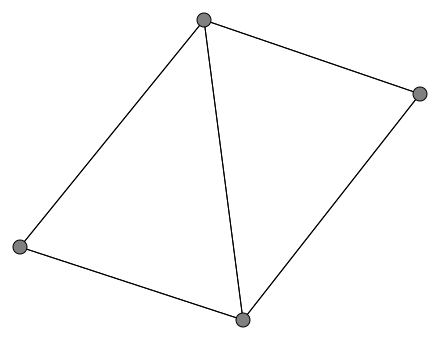

In [3]:
edge_list = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
adjacency = from_edge_list(edge_list)

image = svg_graph(adjacency)
SVG(image)

By default, the graph is undirected, but you can easily make it directed.

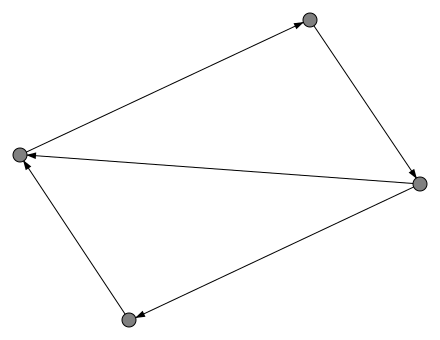

In [5]:
adjacency = from_edge_list(edge_list, directed=True)

image = svg_digraph(adjacency)
SVG(image)

You might also want to add weights to your edges. Just use triplets instead of pairs!

In [ ]:
edge_list = [(0, 1, 1), (1, 2, 0.5), (2, 3, 1), (3, 0, 0.5), (0, 2, 2)]
adjacency = from_edge_list(edge_list)

image = svg_graph(adjacency)
SVG(image)

You can instantiate a bipartite graph as well.

In [ ]:
edge_list = [(0, 0), (1, 0), (1, 1), (2, 1)]
biadjacency = from_edge_list(edge_list, bipartite=True)

image = svg_bigraph(biadjacency)
SVG(image)

If nodes are not indexed, you get an object of type ``Bunch`` with graph attributes (node names).

In [ ]:
edge_list = [("Alice", "Bob"), ("Bob", "Carey"), ("Alice", "David"), ("Carey", "David"), ("Bob", "David")]
graph = from_edge_list(edge_list)

In [ ]:
graph

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
image = svg_graph(adjacency, names=names)
SVG(image)

By default, the weight of each edge is the number of occurrences of the corresponding link:

In [ ]:
edge_list_new = edge_list + [("Alice", "Bob"), ("Alice", "David"), ("Alice", "Bob")]
graph = from_edge_list(edge_list_new)

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
image = svg_graph(adjacency, names=names)
SVG(image)

You can make the graph unweighted.

In [ ]:
graph = from_edge_list(edge_list_new, weighted=False)

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
image = svg_graph(adjacency, names=names)
SVG(image)

Again, you can make the graph directed:

In [ ]:
graph = from_edge_list(edge_list, directed=True)

In [ ]:
graph

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
image = svg_digraph(adjacency, names=names)
SVG(image)

The graph can also have explicit weights:

In [ ]:
edge_list = [("Alice", "Bob", 3), ("Bob", "Carey", 2), ("Alice", "David", 1), ("Carey", "David", 2), ("Bob", "David", 3)]
graph = from_edge_list(edge_list)

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
image = svg_graph(adjacency, names=names, display_edge_weight=True, display_node_weight=True)
SVG(image)

For a bipartite graph:

In [ ]:
edge_list = [("Alice", "Football"), ("Bob", "Tennis"), ("David", "Football"), ("Carey", "Tennis"), ("Carey", "Football")]
graph = from_edge_list(edge_list, bipartite=True)

In [ ]:
biadjacency = graph.biadjacency
names = graph.names
names_col = graph.names_col

In [ ]:
image = svg_bigraph(biadjacency, names_row=names, names_col=names_col)
SVG(image)

## From an adjacency list

You can also load a graph from an adjacency list, given as a list of lists or a dictionary of lists:

In [ ]:
adjacency_list =[[0, 1, 2], [2, 3]]
adjacency = from_adjacency_list(adjacency_list, directed=True)

In [ ]:
image = svg_digraph(adjacency)
SVG(image)

In [ ]:
adjacency_dict = {"Alice": ["Bob", "David"], "Bob": ["Carey", "David"]}
graph = from_adjacency_list(adjacency_dict, directed=True)

In [ ]:
adjacency = graph.adjacency
names = graph.names

In [ ]:
image = svg_digraph(adjacency, names=names)
SVG(image)

## From a dataframe

Your dataframe might consist of a list of edges.

In [ ]:
df = pd.read_csv('miserables.tsv', sep='\t', names=['character_1', 'character_2'])

In [ ]:
df.head()

In [ ]:
edge_list = list(df.itertuples(index=False))

In [ ]:
graph = from_edge_list(edge_list)

In [ ]:
graph

In [ ]:
df = pd.read_csv('movie_actor.tsv', sep='\t', names=['movie', 'actor'])

In [ ]:
df.head()

In [ ]:
edge_list = list(df.itertuples(index=False))

In [ ]:
graph = from_edge_list(edge_list, bipartite=True)

In [ ]:
graph

For categorical data, you can use ``pandas`` to get a bipartite graph between samples and features. We show an example taken from the [Adult Income](https://archive.ics.uci.edu/ml/datasets/adult) dataset.

In [39]:
df = pd.read_csv('adult-income.csv')

In [40]:
df.head()

,age,workclass,occupation,relationship,gender,income
0,40-49,State-gov,Adm-clerical,Not-in-family,Male,<=50K
1,50-59,Self-emp-not-inc,Exec-managerial,Husband,Male,<=50K
2,40-49,Private,Handlers-cleaners,Not-in-family,Male,<=50K
3,50-59,Private,Handlers-cleaners,Husband,Male,<=50K
4,30-39,Private,Prof-specialty,Wife,Female,<=50K


In [53]:
df_binary = pd.get_dummies(df, sparse=True)

In [54]:
df_binary.head()

,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,workclass_ ?,workclass_ Federal-gov,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,gender_ Female,gender_ Male,income_ <=50K,income_ >50K
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [56]:
biadjacency = df_binary.sparse.to_coo()

In [57]:
biadjacency = sparse.csr_matrix(biadjacency)

In [58]:
# biadjacency matrix of the bipartite graph
biadjacency

<32561x42 sparse matrix of type '<class 'numpy.uint8'>'
	with 195366 stored elements in Compressed Sparse Row format>

In [60]:
# names of columns
names_col = list(df_binary)

In [61]:
len(names_col)

42

In [66]:
names_col[:8]

['age_20-29',
 'age_30-39',
 'age_40-49',
 'age_50-59',
 'age_60-69',
 'age_70-79',
 'age_80-89',
 'age_90-99']

## From a CSV file

You can directly load a graph from a CSV or TSV file:

In [ ]:
graph = from_csv('miserables.tsv')

In [ ]:
graph

In [ ]:
graph = from_csv('movie_actor.tsv', bipartite=True)

In [ ]:
graph

The graph can also be given in the form of adjacency lists (check the function ``from_csv``).

## From a GraphML file

You can also load a graph stored in the [GraphML](https://en.wikipedia.org/wiki/GraphML) format.

In [ ]:
graph = from_graphml('miserables.graphml')
adjacency = graph.adjacency
names = graph.names

In [ ]:
# Directed graph
graph = from_graphml('painters.graphml')
adjacency = graph.adjacency
names = graph.names

## From NetworkX

NetworkX has [import](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_scipy_sparse_matrix.html#networkx.convert_matrix.from_scipy_sparse_matrix) and [export](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.to_scipy_sparse_matrix.html#networkx.convert_matrix.to_scipy_sparse_matrix) functions from and towards the CSR format.

## Other options

* You want to test our toy graphs
* You want to generate a graph from a model
* You want to load a graph from existing repositories (see [NetSet](http://netset.telecom-paris.fr/) and [KONECT](http://konect.cc))

Take a look at the other tutorials of the **data** section!